<a href="https://colab.research.google.com/github/TheValour/Basci-Login-/blob/master/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : Rahul Singh
## Project : Credit Card Fraud Detection

* In this notebook I will try to predict fraud transactions from a given data set. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'

**IMPORTING LIBRARIES:**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

**READING DATASET :**

In [8]:
data=pd.read_csv('creditcard.csv')

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**NULL VALUES:**

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

### Droping the row having null value present

In [43]:
data = data.dropna()

**Thus there are no null values in the dataset.**

**INFORMATION**

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9963
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9964 non-null   int64  
 1   V1      9964 non-null   float64
 2   V2      9964 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

**DESCRIPTIVE STATISTICS**

In [45]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,9964.0,5933.588719,4448.730907,0.000000,2061.000000,4546.000000,10162.250000,14861.000000
V1,9964.0,-0.241530,1.522697,-27.670569,-1.011783,-0.372609,1.151550,1.960497
V2,9964.0,0.280348,1.308496,-34.607649,-0.208614,0.286168,0.900736,8.636214
V3,9964.0,0.906359,1.156948,-15.496222,0.412198,0.943149,1.601871,4.101716
V4,9964.0,0.260247,1.440500,-4.657545,-0.615591,0.218492,1.119367,10.463020


In [46]:
data.shape

(9964, 31)

**Thus there are 284807 rows and 31 columns.**

In [47]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**FRAUD CASES AND GENUINE CASES**

In [48]:
fraud_cases=len(data[data['Class']==1])

In [49]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 38


In [50]:
non_fraud_cases=len(data[data['Class']==0])

In [51]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 9926


In [52]:
fraud=data[data['Class']==1]

In [53]:
genuine=data[data['Class']==0]

In [54]:
fraud.Amount.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [55]:
genuine.Amount.describe()

count    9926.000000
mean       62.919501
std       184.041297
min         0.000000
25%         5.172500
50%        15.950000
75%        51.067500
max      7712.430000
Name: Amount, dtype: float64

**EDA**

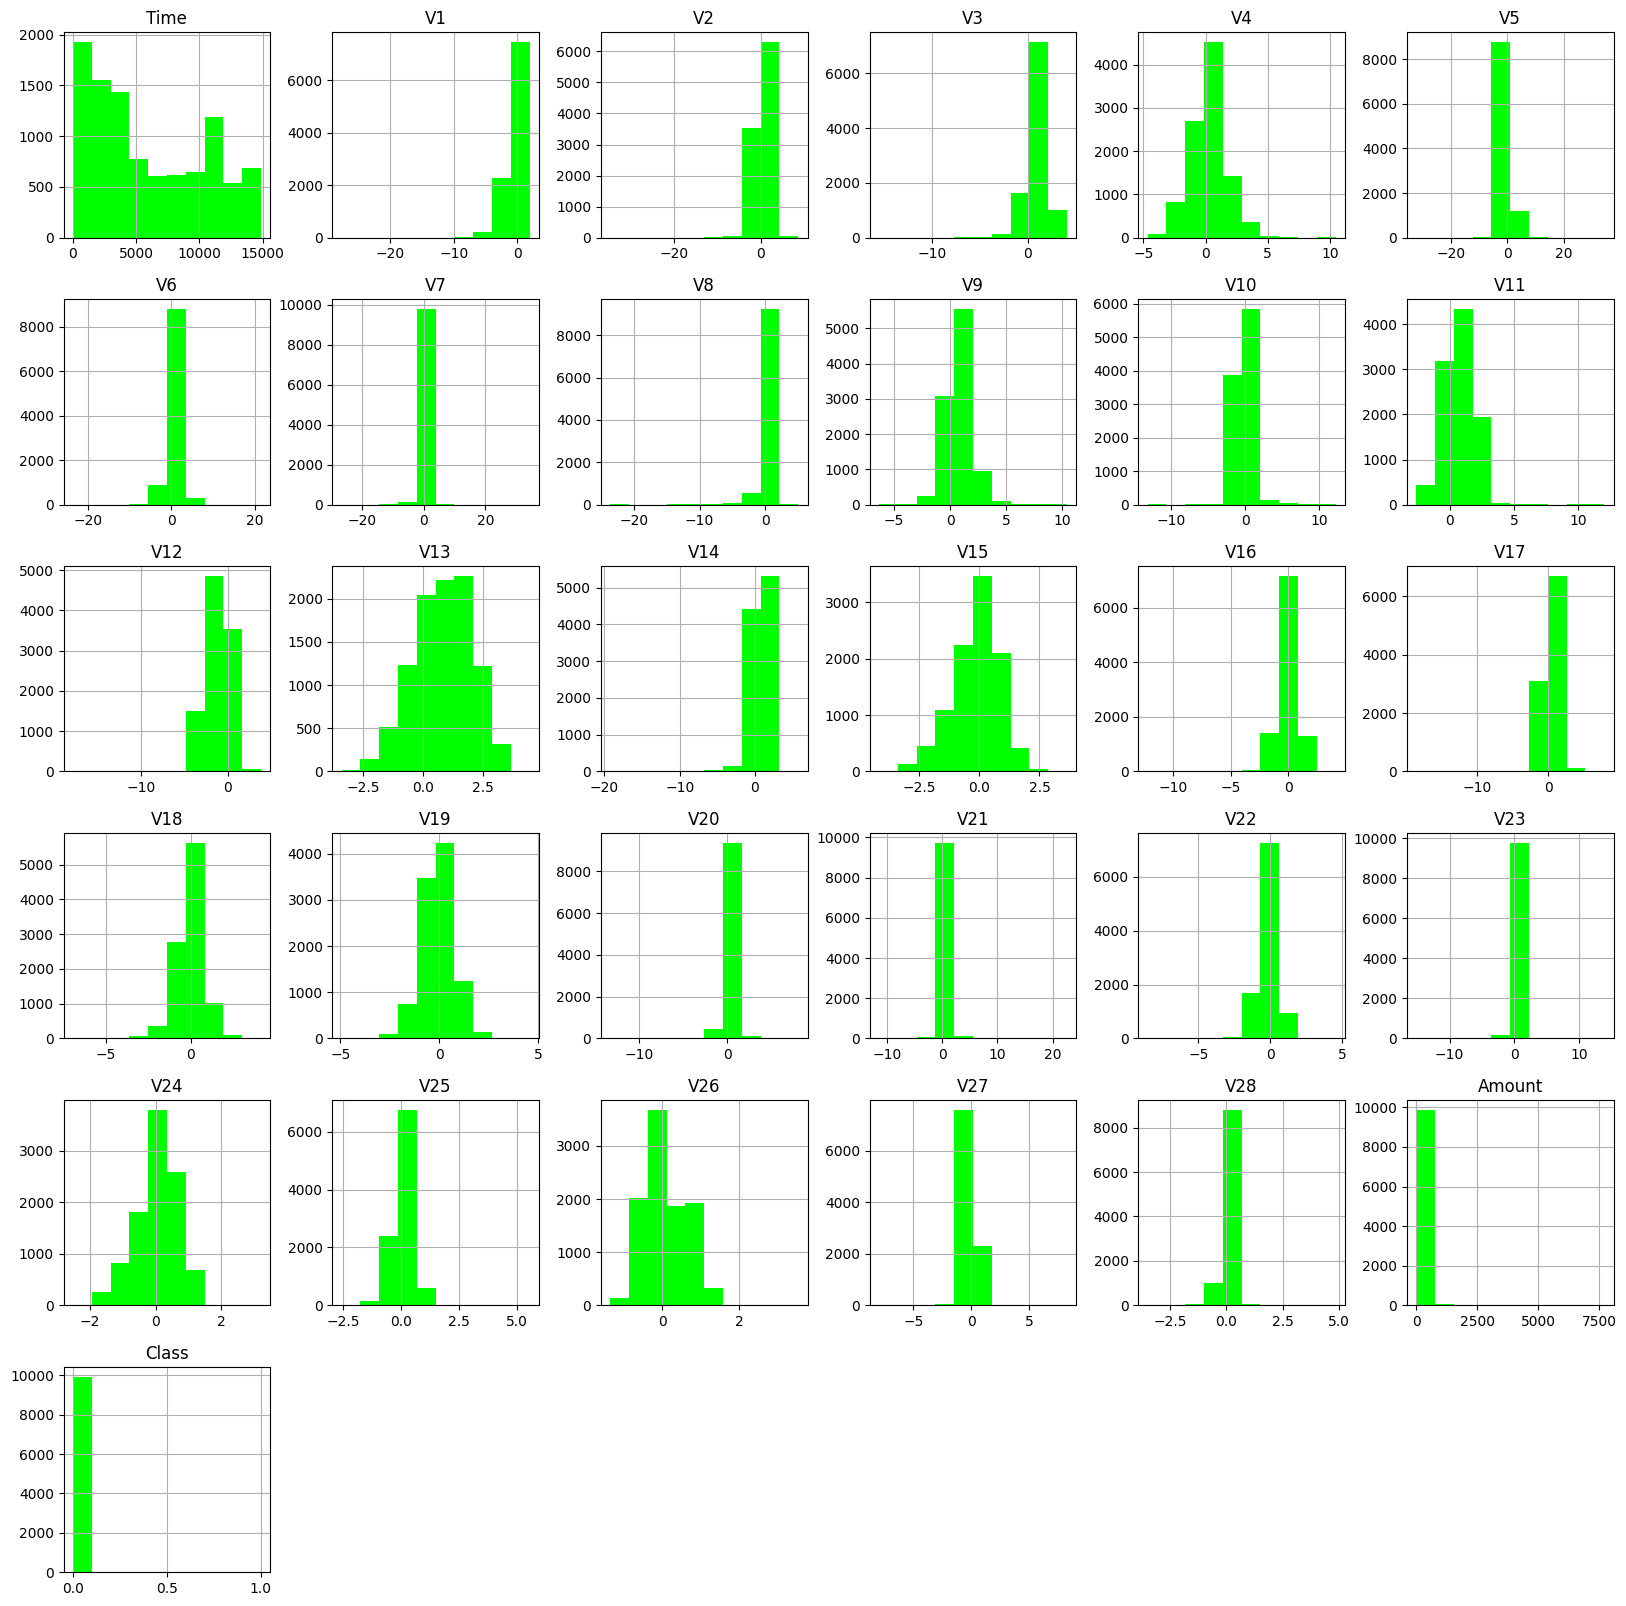

In [56]:
data.hist(figsize=(20,20),color='lime')
plt.show()

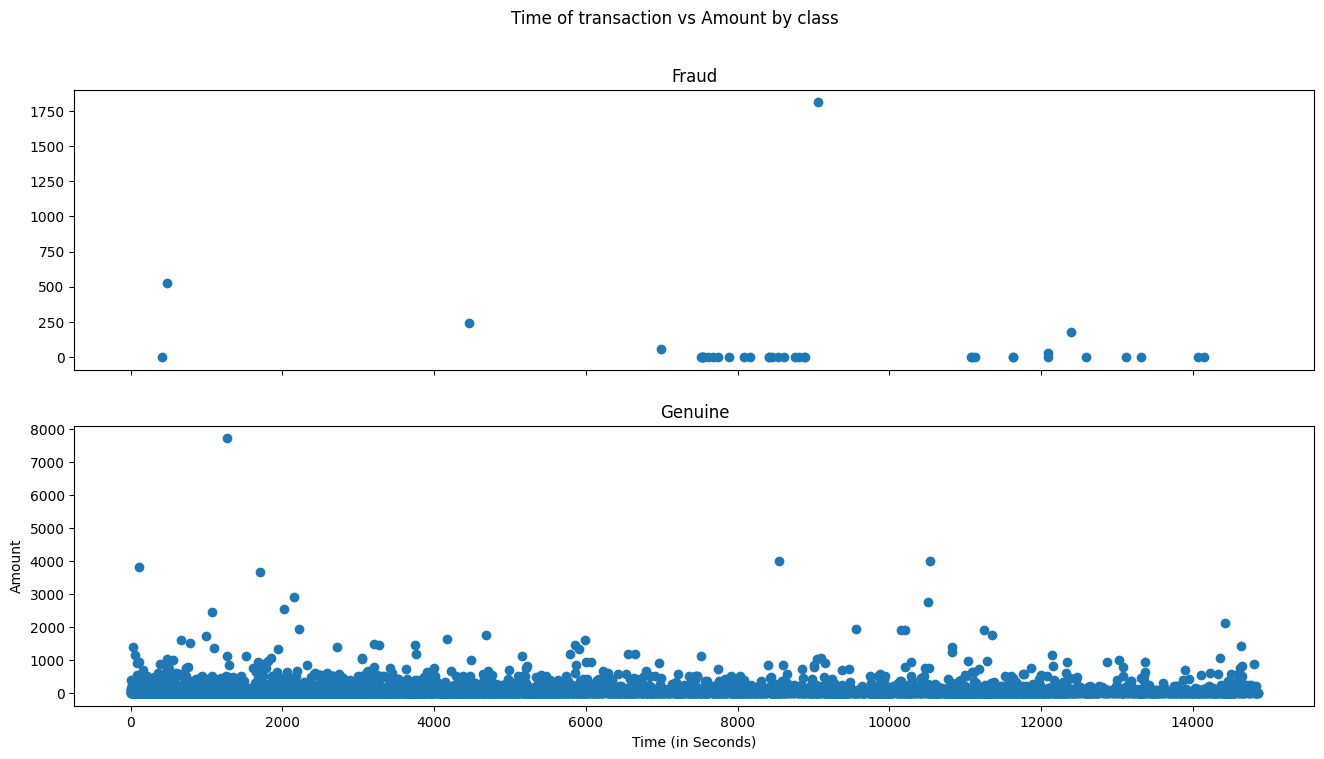

In [57]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


**CORRELATION**

<Axes: >

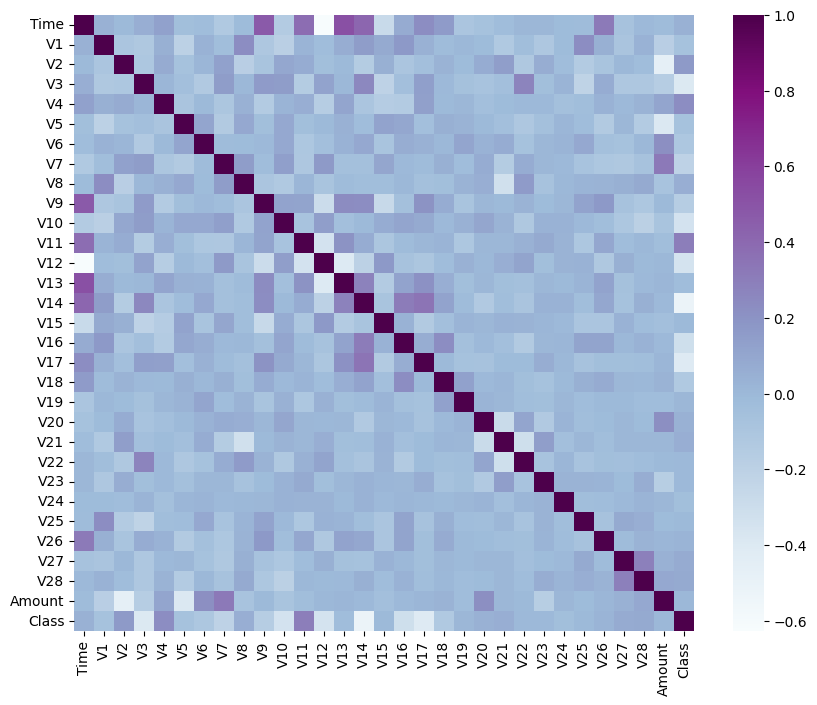

In [58]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

**Let us build our models:**

In [59]:
from sklearn.model_selection import train_test_split

**Model 1:**

In [60]:
X=data.drop(['Class'],axis=1)

In [61]:
y=data['Class']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [63]:
X_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc=RandomForestClassifier()

In [80]:
model=rfc.fit(X_train,y_train)

In [81]:
prediction=model.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_test,prediction)

0.9993311036789297

**Model 2:**

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
X1=data.drop(['Class'],axis=1)

In [86]:
y1=data['Class']

In [87]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [88]:
lr=LogisticRegression()

In [89]:
model2=lr.fit(X1_train,y1_train)

In [90]:
prediction2=model2.predict(X1_test)

In [91]:
accuracy_score(y1_test,prediction2)

0.9996655518394649

**Model 3:**

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
X2=data.drop(['Class'],axis=1)

In [94]:
y2=data['Class']

In [95]:
dt=DecisionTreeRegressor()

In [96]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [97]:
model3=dt.fit(X2_train,y2_train)

In [98]:
prediction3=model3.predict(X2_test)

In [99]:
accuracy_score(y2_test,prediction3)

0.9993311036789297